In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import matplotlib
import cartopy.crs as ccrs # Projections
import cartopy.feature as cfeature
import cartopy

In [4]:
sentinel_data_A = pd.read_csv("./Sentinel_3A_water_level_Version0.csv")

In [19]:
sentinel_data_A = sentinel_data_A.rename(
    columns={
        "Date (YYYYMMDD)" : "date",
        "Lake_name" : "lake_name",
        "Latitude" : "latitude",
        "Longitude" : "longitude",
        "Relaive_orbit" : "relative_orbit",
        "Lake water level (m)" : "lake_water_level"
    }
)

## Plot ground track along Lake Winnipeg

In [107]:
lake_winnipeg["longitude"]

228868   -96.819518
228869   -96.820913
228870   -96.822309
228871   -96.823704
228872   -96.825099
            ...    
337367   -96.431722
337368   -96.433018
337369   -96.434314
337370   -96.435610
337371   -96.436906
Name: longitude, Length: 108504, dtype: float64

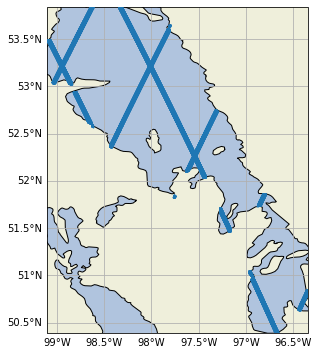

In [122]:
# Lake Winnipeg extent from GeoJSON
# https://geojson.io/#map=7/52.355/-99.888
# extent = [
#     -101.40380859375,
#    -95.877685546875,
#     49.774169585277406,
#     54.15600109028493
# ]

# Get the extent from the data
extent = [
    lake_winnipeg["longitude"].min(),
    lake_winnipeg["longitude"].max(),
    lake_winnipeg["latitude"].min(),
    lake_winnipeg["latitude"].max(),
]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# High resolution lakes
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m')

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_extent(extent)

# ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
# ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(lakes_50m, facecolor='lightsteelblue',edgecolor='black')

# Plot altimetry points
ax.scatter(
    x=np.array(lake_winnipeg["longitude"]),
    y=np.array(lake_winnipeg["latitude"]),
    zorder=10,
    s=1
)
# ax.plot(-97.1384, 52.8951, 'bo', markersize=7, transform=ccrs.Geodetic())

# Format gridlines
# https://scitools.org.uk/cartopy/docs/latest/gallery/gridlines_and_labels/gridliner.html
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
# ax.set_global()
plt.show()